# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_csv('Driving Data(KIA SOUL)_(150728-160714)_(10 Drivers_A-J).csv')

In [3]:
def feature_importance_visualizer(X, model, label, color=None, grid=None):
    """Helper function to visualize the top 10 most important features.

    Args:
        X (pd.DataFrame): Dataframe containing all columns except target.
        model (instance): An instance of a classifier model.
        label (str): Label for model name.
        color (str, optional): Color for bars in plot. Defaults to None.
        grid (bool, optional): Whether gridlines should be included or not. Defaults to None.
    """
    features_list = X.columns.values
    feature_importance = model.feature_importances_

    # Get the indices of the top 10 most important features
    sorted_idx = np.argsort(feature_importance)[-10:]

    plt.figure(figsize=(8, 6))
    plt.barh(range(10), feature_importance[sorted_idx], align='center', color=color)
    plt.yticks(range(10), features_list[sorted_idx])
    plt.xlabel('Importance')
    plt.title("Top 10 Feature Importances According to " + label + " Classifier")
    if grid:
        plt.grid(alpha=0.5)
    plt.show()


In [4]:
df.head(2)

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,...,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,...,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1


In [5]:
df.columns

Index(['Fuel_consumption', 'Accelerator_Pedal_value',
       'Throttle_position_signal', 'Short_Term_Fuel_Trim_Bank1',
       'Intake_air_pressure', 'Filtered_Accelerator_Pedal_value',
       'Absolute_throttle_position', 'Engine_soacking_time',
       'Inhibition_of_engine_fuel_cut_off', 'Engine_in_fuel_cut_off',
       'Fuel_Pressure', 'Long_Term_Fuel_Trim_Bank1', 'Engine_speed',
       'Engine_torque_after_correction', 'Torque_of_friction',
       'Flywheel_torque_(after_torque_interventions)', 'Current_spark_timing',
       'Engine_coolant_temperature', 'Engine_Idel_Target_Speed',
       'Engine_torque', 'Calculated_LOAD_value',
       'Minimum_indicated_engine_torque', 'Maximum_indicated_engine_torque',
       'Flywheel_torque', 'Torque_scaling_factor(standardization)',
       'Standard_Torque_Ratio', 'Requested_spark_retard_angle_from_TCU',
       'TCU_requests_engine_torque_limit_(ETL)',
       'TCU_requested_engine_RPM_increase',
       'Target_engine_speed_used_in_lock-up_modu

In [6]:
df['Class'].value_counts()

Class
D    13244
B    12864
F    11012
H     9880
J     8904
E     8436
I     7808
C     7500
G     7492
A     7240
Name: count, dtype: int64

## Deleting redundant features

In [7]:
# Exists of only one value
columns_same_value = ['Filtered_Accelerator_Pedal_value',
                      'Inhibition_of_engine_fuel_cut_off',
                      'Fuel_Pressure',
                      'Torque_scaling_factor(standardization)',
                      'Glow_plug_control_request']

# Identical/extremely similar columns
columns_double = ['Engine_torque_after_correction']

df = df.drop(labels=columns_same_value + columns_double, axis=1)

In [8]:
df.head()

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Absolute_throttle_position,Engine_soacking_time,Engine_in_fuel_cut_off,Long_Term_Fuel_Trim_Bank1,Engine_speed,...,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,13.3,3,0,-0.8,929,...,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,13.7,3,0,-0.8,726,...,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1
2,217.6,0.0,5.2,0.0,41,13.7,3,0,-0.8,685,...,0.1,1,0.9,0.0,-0.2,0,-3.6,3,A,1
3,204.8,0.0,4.7,0.0,38,13.3,3,0,-0.8,675,...,0.1,1,0.9,0.0,-0.2,0,-3.6,4,A,1
4,217.6,0.0,5.7,0.0,40,13.7,3,0,-0.8,716,...,0.1,1,0.9,0.0,-0.2,0,-3.5,5,A,1


## Feature Selection 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Class'], axis=1), df['Class'], test_size=0.3)

In [10]:
print(X_train.shape)
print(y_train.shape)

(66066, 47)
(66066,)


In [11]:
from sklearn.feature_selection import mutual_info_classif
MI = mutual_info_classif(X_train, y_train)
MI

array([0.05001958, 0.06838031, 0.07023505, 0.01641451, 0.18398251,
       0.06639161, 0.89553829, 0.00131638, 0.46064093, 0.05174836,
       0.22746683, 0.05598448, 0.04256048, 0.07668578, 0.05161167,
       0.05859431, 0.06600234, 0.02093675, 0.17214921, 0.05428457,
       0.        , 0.00507332, 0.00593483, 0.00097995, 0.        ,
       0.09353279, 0.05161693, 0.04463666, 0.45821174, 0.05493953,
       0.05785442, 0.05385418, 0.05253222, 0.05063288, 0.00871258,
       0.0078863 , 0.02507564, 0.050086  , 0.00939234, 0.00360191,
       0.08729008, 0.02858398, 0.01544155, 0.021944  , 0.08612809,
       0.        , 0.00486048])

In [12]:
MI2 = pd.Series(MI)
MI2.index = X_train.columns
MI2.sort_values(ascending=False)[:13]

# Niet:
# fuel_consumption
# calculated_load_value
# wheel velocity 3x
# torque_converter_speed

Engine_soacking_time               0.895538
Long_Term_Fuel_Trim_Bank1          0.460641
Engine_coolant_temperature.1       0.458212
Torque_of_friction                 0.227467
Intake_air_pressure                0.183983
Maximum_indicated_engine_torque    0.172149
Activation_of_Air_compressor       0.093533
Master_cylinder_pressure           0.087290
Steering_wheel_angle               0.086128
Engine_coolant_temperature         0.076686
Throttle_position_signal           0.070235
Accelerator_Pedal_value            0.068380
Absolute_throttle_position         0.066392
dtype: float64

<Axes: >

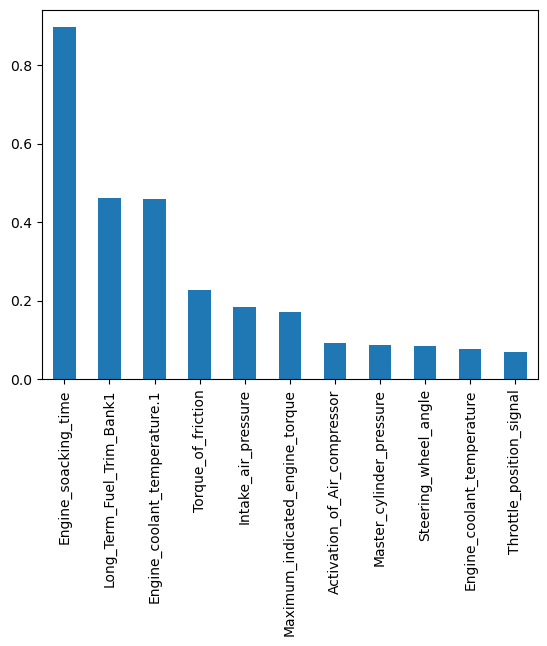

In [13]:
MI2.sort_values(ascending=False)[:11].plot(kind='bar')

In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [15]:
classifier_rf.oob_score_

0.6492749674567856

In [16]:
"""rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)"""

'rf = RandomForestClassifier(random_state=42, n_jobs=-1)\n\nparams = {\n    \'max_depth\': [2,3,5,10,20],\n    \'min_samples_leaf\': [5,10,20,50,100,200],\n    \'n_estimators\': [10,25,30,50,100,200]\n}\n\nfrom sklearn.model_selection import GridSearchCV\n\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator=rf,\n                           param_grid=params,\n                           cv = 4,\n                           n_jobs=-1, verbose=1, scoring="accuracy")\n\ngrid_search.fit(X_train, y_train)'

In [17]:
#rf_best = grid_search.best_estimator_

rf_best = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=20,min_samples_leaf=5, n_estimators=200)
rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [18]:
y_pred_test = rf_best.predict(X_test)

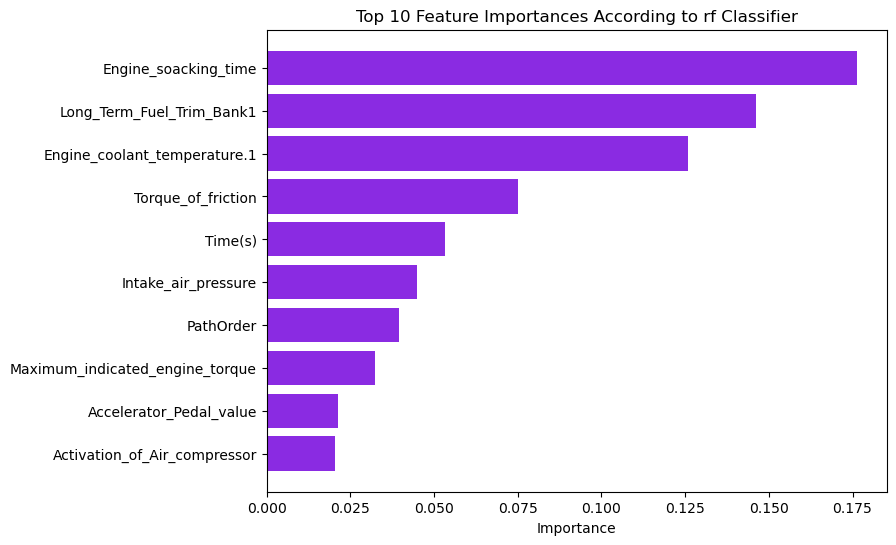

In [19]:
feature_importance_visualizer(df.drop(labels=['Class'], axis=1), rf_best, 'rf', color="blueviolet")

In [20]:
confusion_matrix(y_test, y_pred_test)

array([[2141,    0,    4,    0,    0,    0,    1,    1,    0,    2],
       [   2, 3884,    0,    6,    3,    4,    0,    7,    0,    0],
       [   3,    0, 2213,   47,    0,    0,    1,    0,    4,    0],
       [   0,   16,   15, 3967,    1,   22,    0,    1,    2,    1],
       [   0,    0,    2,    0, 2569,    0,    0,    0,    0,    1],
       [   0,    6,    0,    0,    5, 3277,    0,    0,    0,    0],
       [   0,    2,    1,    5,    0,    0, 2250,    1,    0,    0],
       [   0,   24,    1,    3,    2,    0,    0, 2873,    0,    0],
       [   2,    0,    4,    2,    0,    0,    2,    3, 2206,  121],
       [   0,    0,    1,    2,    1,    0,    1,    0,    2, 2597]],
      dtype=int64)

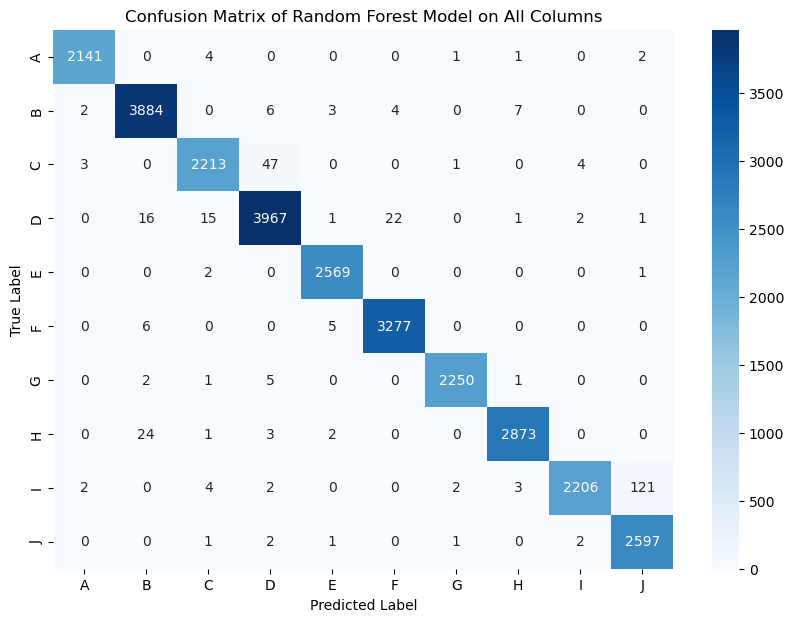

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels= ['A',  'B',  'C',  'D',  'E',  'F',  'G',  'H',  'I',  'J'], 
            yticklabels= ['A',  'B',  'C',  'D',  'E',  'F',  'G',  'H',  'I',  'J'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Random Forest Model on All Columns')
plt.show()

In [22]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2149
           B       0.99      0.99      0.99      3906
           C       0.99      0.98      0.98      2268
           D       0.98      0.99      0.98      4025
           E       1.00      1.00      1.00      2572
           F       0.99      1.00      0.99      3288
           G       1.00      1.00      1.00      2259
           H       1.00      0.99      0.99      2903
           I       1.00      0.94      0.97      2340
           J       0.95      1.00      0.98      2604

    accuracy                           0.99     28314
   macro avg       0.99      0.99      0.99     28314
weighted avg       0.99      0.99      0.99     28314



In [24]:
# df.plot(x='Engine_torque', y='Engine_torque_after_correction', style='o')
#df.plot(y=['Engine_torque', 'Engine_torque_after_correction'], kind='line')


In [25]:
#df.plot(y=['Engine_torque_after_correction', 'Engine_torque'], kind='line')

So engine_torque not exactly the same as engine_torque_after_correction, but almost